REFERENCE : https://pinkwink.kr/1324

In [ ]:
# wordcloud  한글 폰트 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# matplotlib 한글폰트 사용하기
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install konlpy wordcloud

In [ ]:
# import libraries
import pandas as pd
from wordcloud import WordCloud
import nltk
from konlpy.corpus import kobill
from konlpy.tag import Okt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Study/데이터분석/크롤링/희동이_글라이더_데이터분석/글라이드 100개.csv', )
df

,Unnamed: 0,content,date,like,place,tags
0,0,#협찬 햇반과 만두에 이어 접해본 글라이드 콰트로치즈피자!중간 유통과정 뺀 집까지 ...,2021-05-04,0.0,NaN,"['#협찬', '#글라이드', '#glyde', '#피자', '#치즈피자', '#콰..."
1,1,캠핑은 역시 #간편식 그래두 난 내가 해먹는게 더 맛있따🥰물론 차돌박이된장찌개는 짱...,2021-05-01,0.0,마시안해변,"['#간편식', '#k8', '#인천', '#무의도', '#glyde', '#글라이..."
2,2,🍚 #협찬[글라이드 즉석밥]⠀⠀⠀⠀⠀⠀⠀즉석밥...,2021-01-07,0.0,NaN,"['#협찬[글라이드', '#글라이드', '#glyde', ..."
3,3,다시 다듬는 접영기존 스트로크 스피드는 줄이고글라이드와 타이밍을 조금 늦춰서길게 하...,2020-08-23,0.0,NaN,"['#swimdevil', '#swimming', '#butterfly', '#wa..."
4,4,"""지금까지 먹은 즉석밥이 쌀 100%가 아니라고?""···우리가 몰랐던 즉석밥의 진실...",2021-02-05,0.0,NaN,"['#글라이드', '#집밥', '#혼밥', '#재택근무', '#한식', '#혼밥스타..."
...,...,...,...,...,...,...
95,95,#광고 #협찬 #신상라면 #글라이드 #glyde #칼칼라면 #속시원한 #속편한라면 ...,2021-06-19,0.0,NaN,"['#광고', '#협찬', '#신상라면', '#글라이드', '#glyde', '#칼..."
96,96,#제품제공 #협찬 받아 #칼칼라면 먹어본 솔직한 소감 밀가루가 ...,2021-06-19,0.0,천호동 우리집,"['#제품제공', '#협찬', '#칼칼라면', '#수제라면', '#글라이드', '#..."
97,97,#광고라면을 아주 즐겨 먹는 편은 아닌데 오랜만에 라면이 넘넘 땡겨서 먹어 본 육...,2021-06-19,0.0,NaN,"['#광고라면을', '#글라이드', '#glyde', '#칼칼라면', '#칼칼한',..."
98,98,#협찬 #라면이다!!#글라이드 #glyde 🍜칼칼라면튀기지 않은 면이라고 해서 먹게...,2021-06-19,0.0,NaN,"['#협찬', '#라면이다!!', '#글라이드', '#glyde', '#칼칼라면',..."


In [ ]:
df = df.drop(labels='Unnamed: 0', axis = 1)
df = df.drop(labels=['place', 'like'], axis=1, )

# 자연어 전처리
---

In [ ]:
sample_tags = df['tags'].str.strip('[]').str.strip("'").to_frame()
sample_tags = sample_tags['tags'].str.strip('').str.replace(pat=r'[^\w]', repl=r'', regex=True).tolist()
sample_tags= "".join(sample_tags)

In [ ]:
t = Okt()
tags = t.nouns(sample_tags)

In [ ]:
tags = nltk.Text(tokens=tags, name='text')

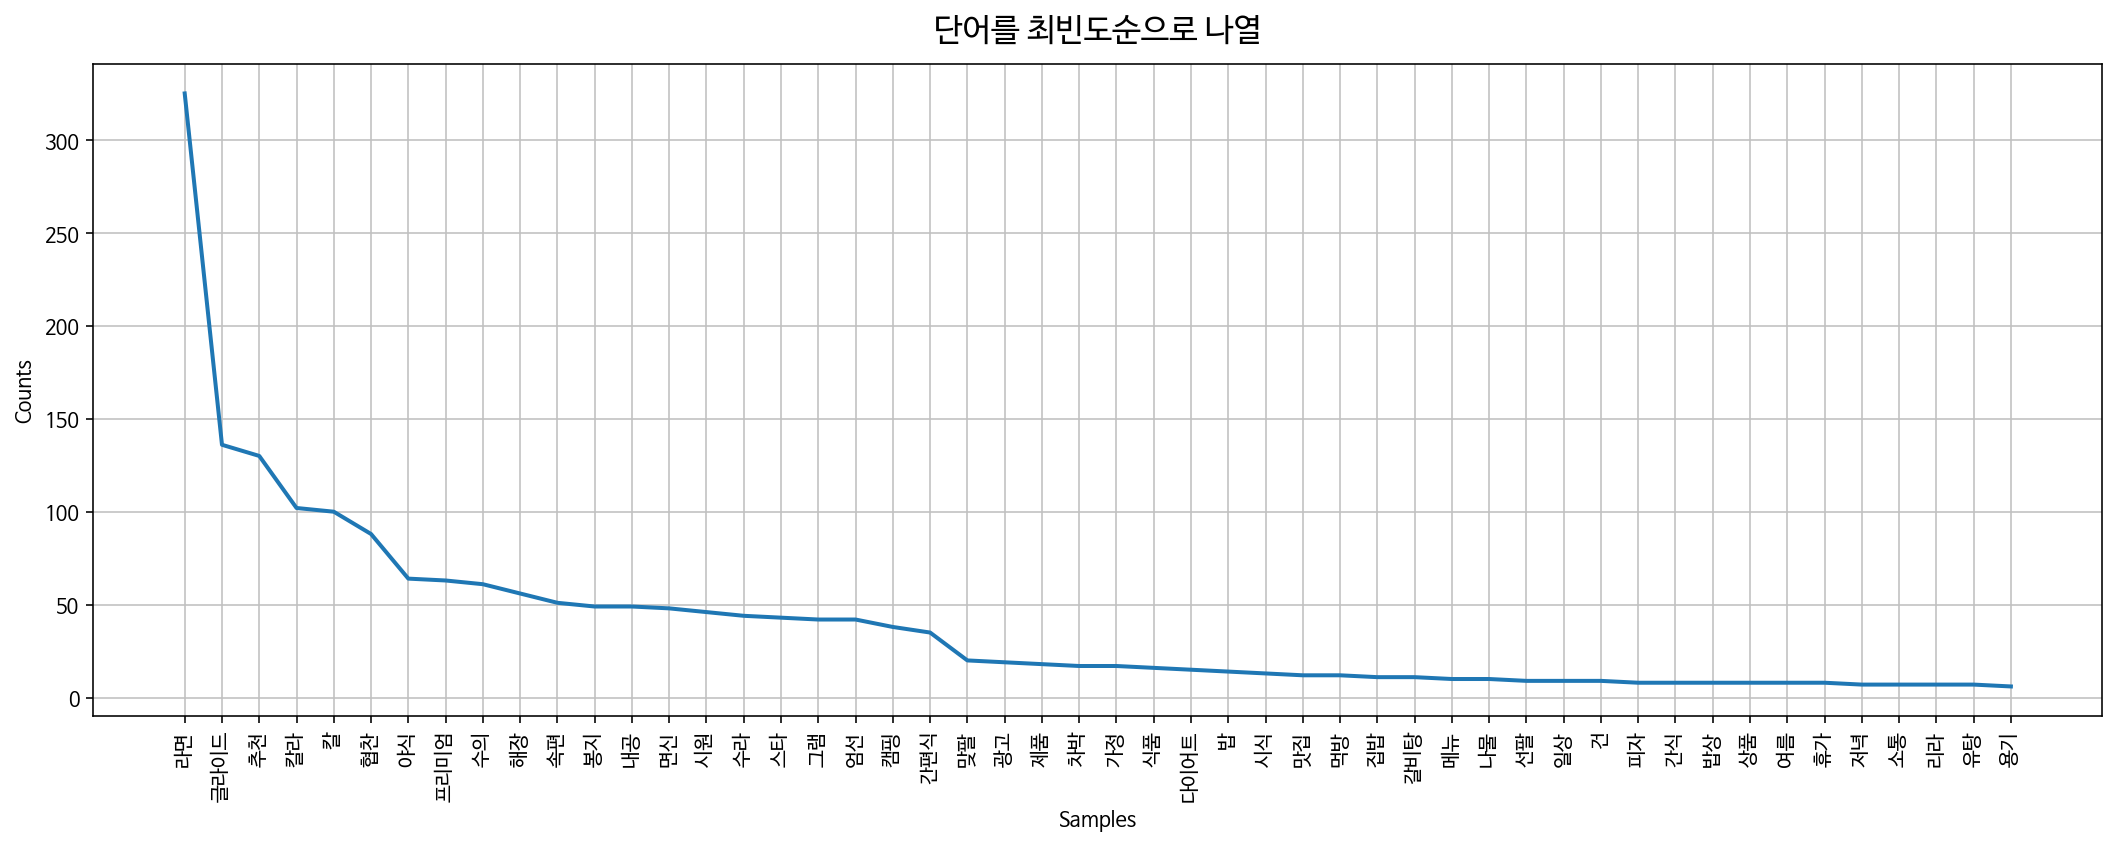

In [ ]:
plt.figure(figsize= ( 18, 6))
plt.title( label='단어를 최빈도순으로 나열', y=1.02, fontsize=16)
plt.xlabel(xlabel='인스타그램 태그 단어')
tags.plot(50) # 인자 : 단어갯수


## WordCloud
---

In [ ]:
from wordcloud import WordCloud


In [ ]:
data = tags.vocab().most_common(70)

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [ ]:
wc = WordCloud(font_path= path, relative_scaling= 0.8,
               background_color='white').generate_from_frequencies(dict(data))

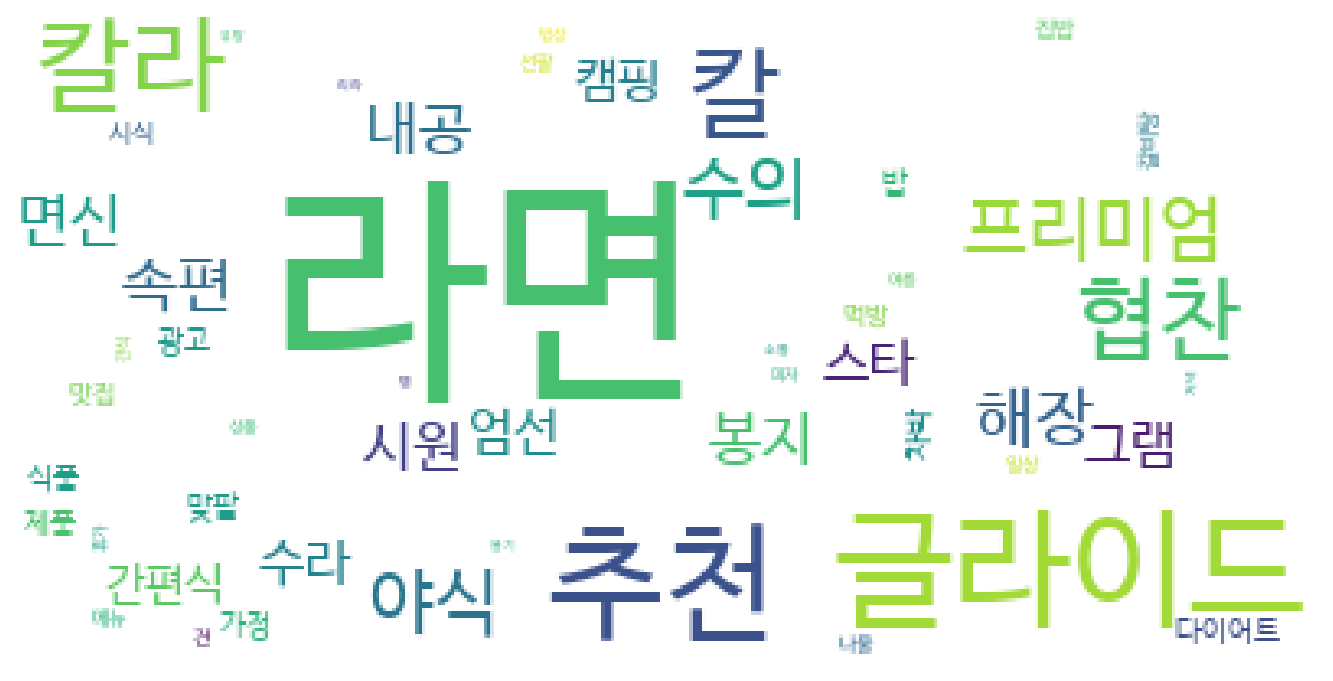

In [ ]:
plt.figure(figsize=(18,6))
plt.imshow(wc)
plt.axis('off')
plt.show()